# Word Cloud Generator 

---



Label(value='Enter the url : ')

Text(value='')

Button(description='Generate Wordcloud', style=ButtonStyle())

Output()

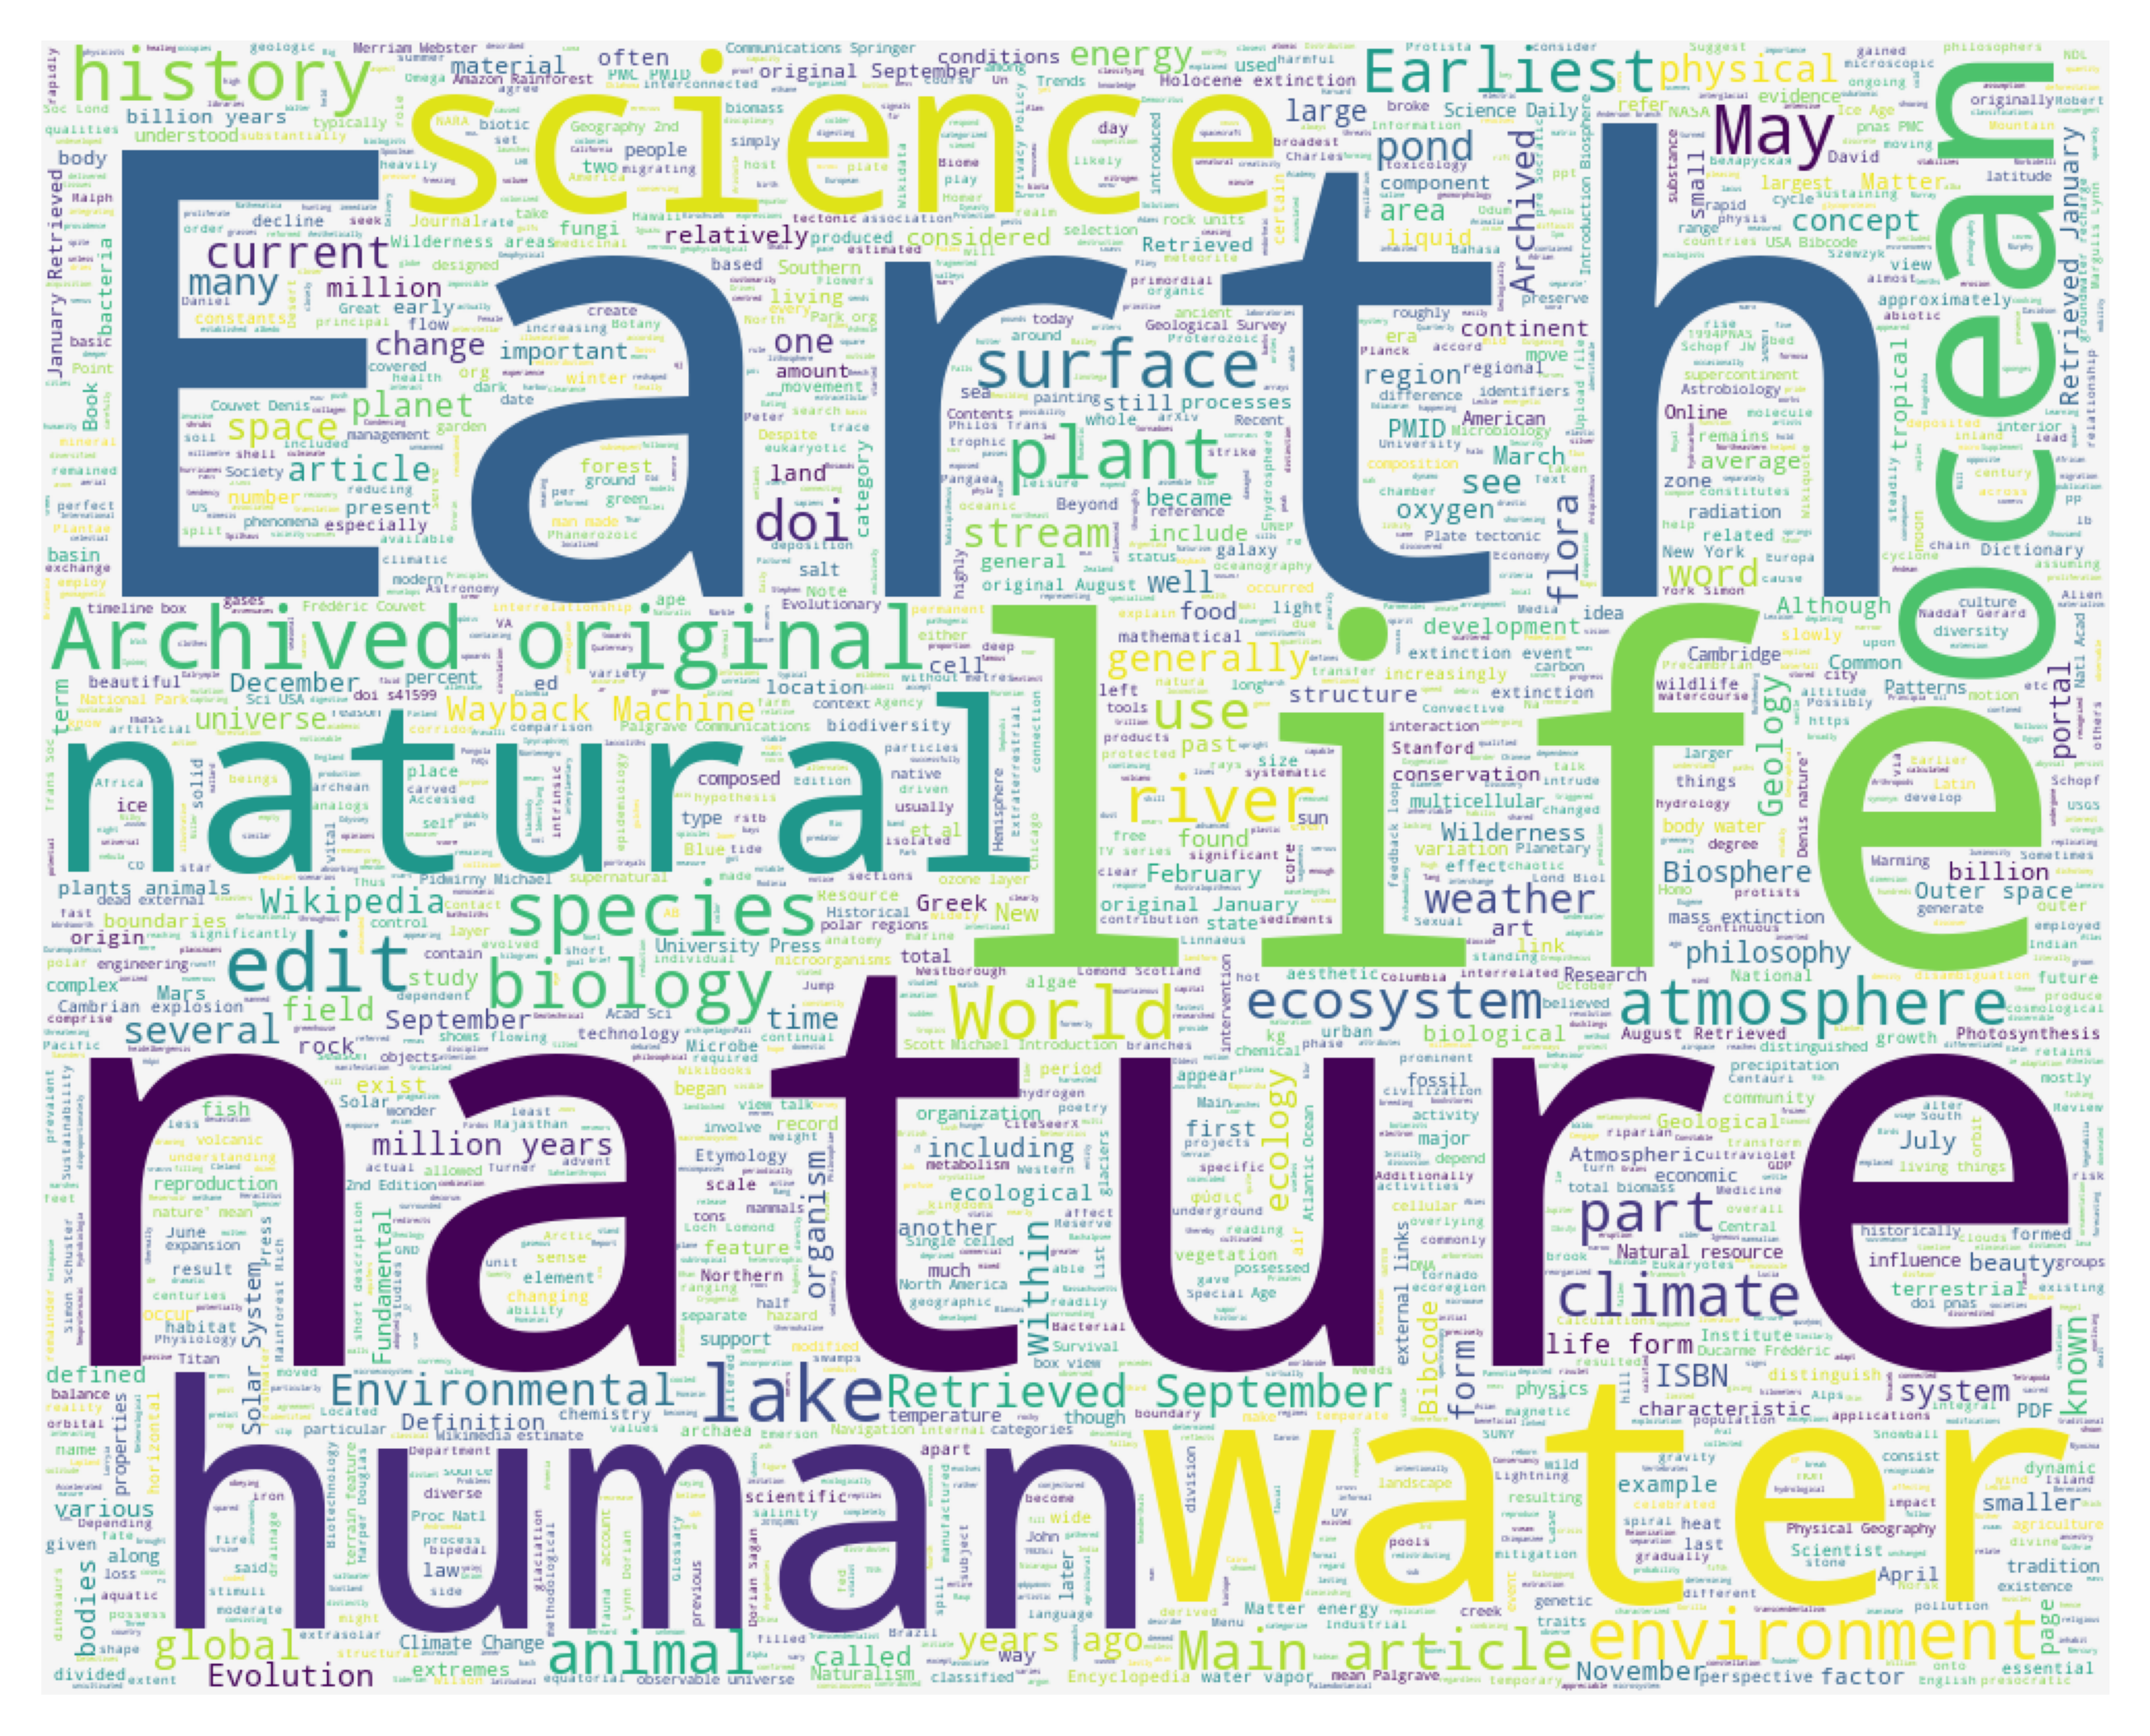

In [41]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from ipywidgets import widgets as w
from IPython.display import display
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 
import requests

l = w.Label('Enter the url : ')
t = w.Text()
b = w.Button(description = 'Generate Wordcloud')
op = w.Output()
display(l)
display(t)
display(b, op)

def wordcloudfunction(x):
  url = t.value
  r = requests.get(url)
  a = r.text
  soup = BeautifulSoup(a)
  for script in soup(["script", "style"]):
      script.decompose()
  strips = list(soup.stripped_strings) 
  final_text = ' '.join(strips)
  stopwords = set(STOPWORDS)
  wc = WordCloud(stopwords=stopwords, width = 1000, height = 800, max_words= 2000, background_color='whitesmoke')
  clouds = wc.generate(final_text)
  with op :
    plt.figure(dpi = 500)
    plt.imshow(clouds)
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show

b.on_click(wordcloudfunction)
